In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import random

from math import pi
import plotly.graph_objects as go

In [6]:
def func1 (x):
  return np.exp(x)-pow(x,3)

In [7]:
func1(1) #try

1.718281828459045

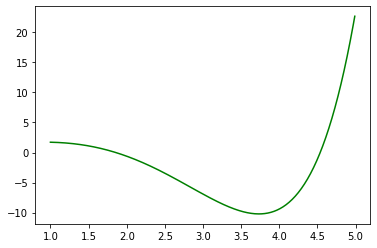

In [8]:
x_arr = np.array(np.arange(1, 5,0.01))
plt.plot(x_arr, func1(x_arr), color="green")

In [9]:
sc.minimize_scalar(func1, bracket=(1,5), method='Brent', tol=1e-2)

     fun: -10.21486177637189
    nfev: 12
     nit: 8
 success: True
       x: 3.7443386680371806

In [10]:
sc.minimize_scalar(func1, bracket=(1,5), method='Golden', tol=1e-2)

     fun: -10.21580721673989
    nfev: 16
     nit: 11
 success: True
       x: 3.7275707832317035

p1 =  1.8544987102945192  p2 =  4.530518514397477
187 µs ± 19.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
G:       fun: -10.216100665215627
    nfev: 29
     nit: 21
 success: True
       x: 3.7330834155975574
173 µs ± 23 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
B:       fun: -10.216100664299063
    nfev: 13
     nit: 9
 success: True
       x: 3.733068365940542


<function matplotlib.pyplot.show(*args, **kw)>

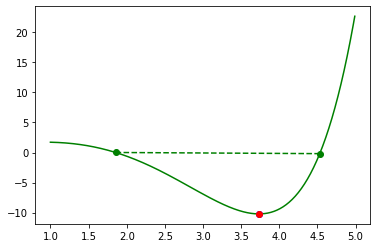

In [113]:
x1 = 1
x2 = 5
x_arr = np.array(np.arange(x1, x2, 0.01))
#print(random.uniform(x1,x2))
p1 = random.uniform(x1,x2)
p2 = random.uniform(p1,x2)
bracket = np.array([p1,p2])

print("p1 = ",p1," p2 = ",p2)

%timeit -n 100 -r 100  a = sc.minimize_scalar(func1, bracket = bracket, method = 'Golden', tol = 1e-5)
print ("G: ",a)
%timeit -n 100 -r 100  b = sc.minimize_scalar(func1, bracket = bracket, method = 'Brent', tol = 1e-5)
print ("B: ",b)

plt.plot(x_arr, func1(x_arr), color="green")

plt.plot(bracket, func1(bracket), color="green", marker = "o",linestyle="--")
plt.plot(a.x, a.fun, c = 'b', marker = "o")
plt.plot(b.x, b.fun, c = 'r', marker = "o")
plt.show

In [108]:
sc.minimize_scalar(func1, bounds = [1, 5], method = 'Bounded', tol = 1e-2)

     fun: -10.216099455731673
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 3.7334320476004086

p1 =  2.373509540751816  p2 =  3.454921100278313
B:       fun: -9.58377822978424
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 3.4549146541343374


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:784: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


<function matplotlib.pyplot.show(*args, **kw)>

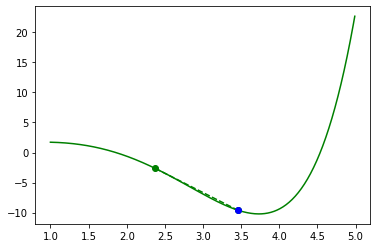

In [121]:
x1 = 1
x2 = 5
x_arr = np.array(np.arange(x1, x2, 0.01))
#print(random.uniform(x1,x2))
p1 = random.uniform(x1,x2)
p2 = random.uniform(p1,x2)
bracket = np.array([p1,p2])

print("p1 = ",p1," p2 = ",p2)

a = sc.minimize_scalar(func1, bounds = bracket, method = 'Bounded', tol = 1e-5)
print ("B: ",a)


plt.plot(x_arr, func1(x_arr), color="green")

plt.plot(bracket, func1(bracket), color="green", marker = "o",linestyle="--")
plt.plot(a.x, a.fun, c = 'b', marker = "o")
plt.show

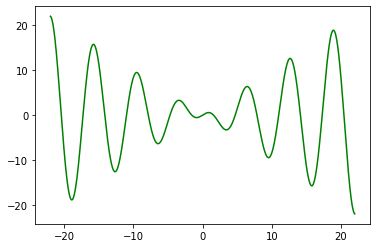

In [125]:
def func2(x):
  return x * np.cos(x)

x_arr2 = np.array(np.arange(-7 * pi, 7 * pi, 0.01))
plt.plot(x_arr2, func2(x_arr2),color="green")

p1 =  -9.846894269282057  p2 =  6.876395521512528
Br:       fun: -9.477294251656831
    nfev: 15
     nit: 11
 success: True
       x: -9.529374596215545
Bo:       fun: -3.288371395590848
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -3.425618618417672


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:784: RuntimeWarning:

Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.



<function matplotlib.pyplot.show(*args, **kw)>

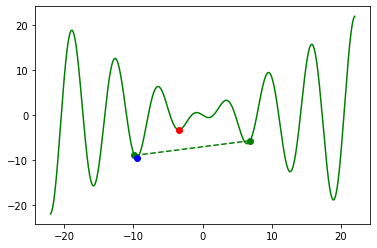

In [151]:
def func1but(x):
  return -func2(x)

x1 = -7 * pi
x2 =  7 * pi
x_arr2 = np.array(np.arange(-7 * pi, 7 * pi, 0.01))

p1 = random.uniform(x1,x2)
p2 = random.uniform(p1,x2)
bracket = np.array([p1,p2])

print("p1 = ",p1," p2 = ",p2)

a = sc.minimize_scalar(func1but, bracket = bracket, method = 'Brent', tol = 1e-5)
print ("Br: ",a)
b = sc.minimize_scalar(func1but, bounds = bracket, method = 'Bounded', tol = 1e-5)
print ("Bo: ",b)

plt.plot(x_arr2, func1but(x_arr2), color="green")

plt.plot(bracket, func1but(bracket), color="green", marker = "o",linestyle="--")
plt.plot(a.x, a.fun, c = 'b', marker = "o")
plt.plot(b.x, b.fun, c = 'r', marker = "o")
plt.show

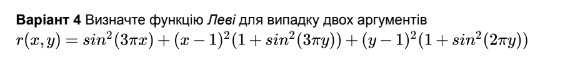

In [131]:
def r(x,y):
  return pow(np.sin(3*pi*x),2)+pow(x-1,2)*(1+pow(np.sin(3*pi*y),2)+pow(y-1,2)*(1+pow(np.sin(2*pi*y),2)))
r = np.vectorize(r)

In [136]:
x1 = - 5.12; x2 = 5.12
xaxis = yaxis = np.linspace(x1, x2, 101)
x, y = np.meshgrid(xaxis, yaxis)
z = r(x, y)

fig = go.Figure(data=go.Surface(x=xaxis, y=yaxis, z=z, colorscale='blues'))
fig.update_layout(
     width=520, height=400, 
     margin=dict(l=0, r=0, b=0, t=15, pad=0), 
     scene={"aspectratio": {"x": 1, "y": 1, "z": 0.5}} 
)

In [137]:
fig = go.Figure(
                    data=go.Contour(x=xaxis, y=yaxis, z=z, colorscale='Hot',
                    contours_coloring='heatmap', # плавна зміна кольору
                    name='r(x,y)' # назва об'єкту, що створюється
                  )
                )
# Рекомендовані налаштування
fig.update_layout(
                  width=450, height=400,
                  margin=dict(l=0, r=0, b=0, t=25, pad=0),
                  yaxis=dict(scaleanchor="x", scaleratio=1), # масштаб по y - як по x
                  showlegend=False # не показувати легенду
                  )

In [138]:
x = np.array([x1, x2])
bounds = np.array([x, x])
x0 = np.array([random.uniform(x1, x2), random.uniform(x1, x2)])
result = sc.minimize(lambda x: r(*x), x0, bounds = bounds)

print('x0 = ', x0)
print('minimize:', result)

x0 =  [-1.63373192 -1.440109  ]
minimize:       fun: array(5.01540005e-15)
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.53432333e-06, 2.49691912e-15])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([ 1.00000001, -2.95314096])
